In [8]:
from SimuSamp.new_funcs.load.SpatDat import SpatDat
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from shapely.wkt import loads

In [2]:
parent_filepath = "C:/Users/Michael/Desktop/block_data"
sampleids = ["01_F", "01_G", "02_G", "02_H", "03_B", "03_H", "04_I", "04_N", "05_G", "05_I", "06_H", "07_K", "08_J", "09_E", "10_B", "11_E", "11_F", "12_M", "13_G", "14_I", "15_G", "16_B", "17_I", "18_E", "19_F", "21_I", "22_N", "23_B", "24_I", "25_M", "26_I", "27_H", "28_FSC", "29_L", "30_D"]

font_dict = {"fontsize": 12, "fontweight": "bold", "fontname": "Arial"}

### Calculate HPFs for all samples

In [ ]:
hpfs_600 = []
hpfs_1000 = []
hpfs_2000 = []
for sampleid in sampleids:
    spatdat = SpatDat(sampleid=sampleid, parent_filepath=parent_filepath)
    
    # Compute 0.6mm fields
    spatdat.compute_fields(width_microns=600)
    hpfs_600.append(spatdat.hpfs)

    # Compute 1.0mm fields
    spatdat.compute_fields(width_microns=1000)
    hpfs_1000.append(spatdat.hpfs)

    # Compute 2.0mm fields
    spatdat.compute_fields(width_microns=2000)
    hpfs_2000.append(spatdat.hpfs)

hpfs_600 = pd.concat(hpfs_600).reset_index(drop=True)
hpfs_1000 = pd.concat(hpfs_1000).reset_index(drop=True)
hpfs_2000 = pd.concat(hpfs_2000).reset_index(drop=True)

In [ ]:
mean_600 = hpfs_600.groupby(["sampleid", "region"])["density"].transform("mean").reset_index(drop=True)
std_600 = hpfs_600.groupby(["sampleid", "region"])["density"].transform("std").reset_index(drop=True)

mean_1000 = hpfs_1000.groupby(["sampleid", "region"])["density"].transform("mean").reset_index(drop=True)
std_1000 = hpfs_1000.groupby(["sampleid", "region"])["density"].transform("std").reset_index(drop=True)

mean_2000 = hpfs_2000.groupby(["sampleid", "region"])["density"].transform("mean").reset_index(drop=True)
std_2000 = hpfs_2000.groupby(["sampleid", "region"])["density"].transform("std").reset_index(drop=True)

hpfs_600["norm_density"] = (hpfs_600["density"] - mean_600) / std_600

hpfs_1000["norm_density"] = (hpfs_1000["density"] - mean_1000) / std_1000

hpfs_2000["norm_density"] = (hpfs_2000["density"] - mean_2000) / std_2000

In [44]:
hpfs_600.to_excel("../../../../Data/hpfs_600.xlsx", index=False)
hpfs_1000.to_excel("../../../../Data/hpfs_1000.xlsx", index=False)
hpfs_2000.to_excel("../../../../Data/hpfs_2000.xlsx", index=False)

## Sample Size Estimation

In [4]:
hpfs_600 = pd.read_excel("../../../../Data/hpfs_600.xlsx")
hpfs_1000 = pd.read_excel("../../../../Data/hpfs_1000.xlsx")
hpfs_2000 = pd.read_excel("../../../../Data/hpfs_2000.xlsx")

In [36]:
hpf_tum = [loads(x) for x in hpfs_600[(hpfs_600["sampleid"] == "01_F") & (hpfs_600["region"] == "tumour")]["geometry"]]
hpf_tum = gpd.GeoDataFrame(geometry=hpf_tum)

hpf_im = [loads(x) for x in hpfs_600[(hpfs_600["sampleid"] == "01_F") & (hpfs_600["region"] == "IM")]["geometry"]]
hpf_im = gpd.GeoDataFrame(geometry=hpf_im)

In [17]:
spatdat = SpatDat("01_F", "../../../../Simulated WS Sampling/block_data/")

In [18]:
tum = spatdat.subset_annotation("tumour")
im = spatdat.subset_annotation("IM")

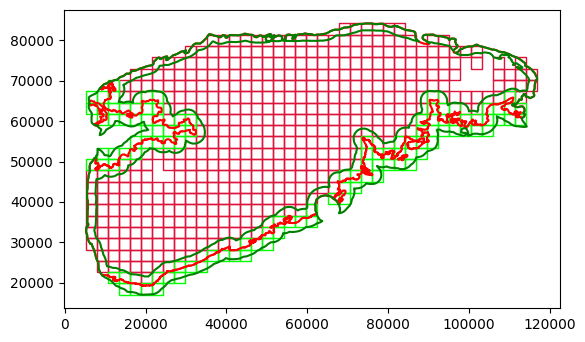

In [37]:
hpf_tum.plot(color="None", edgecolor="crimson")
hpf_im.plot(color="None", edgecolor="lime", ax=plt.gca())
for geom in tum.geoms:
    plt.plot(*geom.exterior.xy, color="red")
for geom in im.geoms:
    plt.plot(*geom.exterior.xy, color="green")
    
plt.savefig("../../../../Data/example_hpfs_600.png", dpi=300, transparent=True)

In [4]:
def sample_size_estimator(data_mean, data_std, rel_error=0.2, z=1.96):
    n = (z * data_std / (data_mean * rel_error)) ** 2
    return n

In [5]:
samples = []
regions = []
ns = []
area_per_sample = []
for sampleid in sampleids:
    test_tum = hpfs_600[(hpfs_600["sampleid"] == sampleid) & (hpfs_600["region"] == "tumour")].reset_index(drop=True)

    test_im = hpfs_600[(hpfs_600["sampleid"] == sampleid) & (hpfs_600["region"] == "IM")].reset_index(drop=True)

    # Plot Tumour histogram =========================================
    plt.hist(test_tum["norm_density"], bins=100, color="lightcoral", edgecolor="black")

    plt.xlabel("Stdev from Mean Density", fontdict=font_dict)
    plt.ylabel("Frequency", fontdict=font_dict)

    plt.title(f"{sampleid} Tumour Density Distribution", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/Density/Distributions_600/{sampleid}_tumour_den_distribution.png", dpi=300, transparent=True)

    plt.cla()
    plt.clf()
    # ===============================================================

    # Plot IM histogram =============================================
    plt.hist(test_im["norm_density"], bins=100, color="lightgreen", edgecolor="black", density=True)

    plt.xticks(fontsize=10, fontname="Arial")
    plt.yticks(fontsize=10, fontname="Arial")

    plt.xlabel("Stdev from Mean Density", fontdict=font_dict)
    plt.ylabel("Frequency", fontdict=font_dict)

    plt.title(f"{sampleid} Tumour Density Distribution", fontdict=font_dict)

    plt.savefig(f"../../../../Data/Plots/Density/Distributions_600/{sampleid}_IM_den_distribution.png", dpi=300, transparent=True)

    plt.cla()
    plt.clf()
    # ===============================================================

    tum_mean = test_tum["density"].mean()
    tum_std = test_tum["density"].std()

    im_mean = test_im["density"].mean()
    im_std = test_im["density"].std()

    tum_n = sample_size_estimator(tum_mean, tum_std)
    im_n = sample_size_estimator(im_mean, im_std)

    samples.append(sampleid)
    regions.append("tumour")
    ns.append(tum_n)
    area_per_sample.append(0.6 ** 2)
    samples.append(sampleid)
    regions.append("IM")
    ns.append(im_n)
    area_per_sample.append(0.6 ** 2)

samples_600 = pd.DataFrame({"sampleid": samples, "region": regions, "samples": ns, "area_per_sample": area_per_sample})

<Figure size 640x480 with 0 Axes>

In [6]:
samples = []
regions = []
ns = []
area_per_sample = []
for sampleid in sampleids:
    test_tum = hpfs_1000[(hpfs_1000["sampleid"] == sampleid) & (hpfs_1000["region"] == "tumour")].reset_index(drop=True)

    test_im = hpfs_1000[(hpfs_1000["sampleid"] == sampleid) & (hpfs_1000["region"] == "IM")].reset_index(drop=True)

    tum_mean = test_tum["density"].mean()
    tum_std = test_tum["density"].std()

    im_mean = test_im["density"].mean()
    im_std = test_im["density"].std()

    if any(test_tum["norm_density"].isna()):
        pass
    else:
        # Plot Tumour histogram =======================================
        plt.hist(test_tum["norm_density"], bins=100, color="lightcoral", edgecolor="black")

        plt.xlabel("Stdev from Mean Density", fontdict=font_dict)
        plt.ylabel("Frequency", fontdict=font_dict)

        plt.title(f"{sampleid} Tumour Density Distribution", fontdict=font_dict)

        plt.savefig(f"../../../../Data/Plots/Density/Distributions_1000/{sampleid}_tumour_den_distribution.png", dpi=300, transparent=True)

        plt.cla()
        plt.clf()
        # =============================================================

    if any(test_im["norm_density"].isna()):
        pass
    else:
        # Plot IM histogram =============================================
        plt.hist(test_im["norm_density"], bins=100, color="lightgreen", edgecolor="black", density=True)

        plt.xticks(fontsize=10, fontname="Arial")
        plt.yticks(fontsize=10, fontname="Arial")

        plt.xlabel("Stdev from Mean Density", fontdict=font_dict)
        plt.ylabel("Frequency", fontdict=font_dict)

        plt.title(f"{sampleid} Tumour Density Distribution", fontdict=font_dict)

        plt.savefig(f"../../../../Data/Plots/Density/Distributions_1000/{sampleid}_IM_den_distribution.png", dpi=300, transparent=True)

        plt.cla()
        plt.clf()
        # =============================================================
    
    
    tum_n = sample_size_estimator(tum_mean, tum_std)
    im_n = sample_size_estimator(im_mean, im_std)

    samples.append(sampleid)
    regions.append("tumour")
    ns.append(tum_n)
    area_per_sample.append(1.0 ** 2)
    samples.append(sampleid)
    regions.append("IM")
    ns.append(im_n)
    area_per_sample.append(1.0 ** 2)

samples_1000 = pd.DataFrame({"sampleid": samples, "region": regions, "samples": ns, "area_per_sample": area_per_sample})

<Figure size 640x480 with 0 Axes>

In [7]:
samples = []
regions = []
ns = []
area_per_sample = []
for sampleid in sampleids:
    test_tum = hpfs_2000[(hpfs_2000["sampleid"] == sampleid) & (hpfs_2000["region"] == "tumour")].reset_index(drop=True)

    test_im = hpfs_2000[(hpfs_2000["sampleid"] == sampleid) & (hpfs_2000["region"] == "IM")].reset_index(drop=True)

    if any(test_tum["norm_density"].isna()):
        pass
    else:
        # Plot Tumour histogram =======================================
        plt.hist(test_tum["norm_density"], bins=100, color="lightcoral", edgecolor="black")

        plt.xlabel("Stdev from Mean Density", fontdict=font_dict)
        plt.ylabel("Frequency", fontdict=font_dict)

        plt.title(f"{sampleid} Tumour Density Distribution", fontdict=font_dict)

        plt.savefig(f"../../../../Data/Plots/Density/Distributions_2000/{sampleid}_tumour_den_distribution.png", dpi=300, transparent=True)

        plt.cla()
        plt.clf()
        # =============================================================

    if any(test_im["norm_density"].isna()):
        pass
    else:
        # Plot IM histogram ===========================================
        plt.hist(test_im["norm_density"], bins=100, color="lightgreen", edgecolor="black", density=True)

        plt.xticks(fontsize=10, fontname="Arial")
        plt.yticks(fontsize=10, fontname="Arial")

        plt.xlabel("Stdev from Mean Density", fontdict=font_dict)
        plt.ylabel("Frequency", fontdict=font_dict)

        plt.title(f"{sampleid} Tumour Density Distribution", fontdict=font_dict)

        plt.savefig(f"../../../../Data/Plots/Density/Distributions_2000/{sampleid}_IM_den_distribution.png", dpi=300, transparent=True)

        plt.cla()
        plt.clf()
        # =============================================================

    tum_mean = test_tum["density"].mean()
    tum_std = test_tum["density"].std()

    im_mean = test_im["density"].mean()
    im_std = test_im["density"].std()

    tum_n = sample_size_estimator(tum_mean, tum_std)
    im_n = sample_size_estimator(im_mean, im_std)

    samples.append(sampleid)
    regions.append("tumour")
    ns.append(tum_n)
    area_per_sample.append(2.0 ** 2)
    samples.append(sampleid)
    regions.append("IM")
    ns.append(im_n)
    area_per_sample.append(2.0 ** 2)

samples_2000 = pd.DataFrame({"sampleid": samples, "region": regions, "samples": ns, "area_per_sample": area_per_sample})

C:\Users\Michael\AppData\Roaming\Python\Python311\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

In [8]:
samples_total = pd.concat([samples_600, samples_1000, samples_2000]).reset_index(drop=True)

In [9]:
samples_total.to_excel("../../../../Data/hpfs_total.xlsx", index=False)

In [ ]:
samples_total = pd.read_excel("../../../../Data/hpfs_total.xlsx")

In [10]:
ws = pd.read_excel("../../../../Data/WS_stats.xlsx")
ws = ws.rename(columns={"sample": "sampleid", "annotation": "region", "density": "ws_density", "area_mm": "ws_area"})

In [11]:
samples_total = samples_total.merge(ws[["sampleid", "region", "ws_density", "ws_area"]], on=["sampleid", "region"], how="left")

In [12]:
samples_total["rel_area_sampled"] = samples_total["samples"] * samples_total["area_per_sample"] / samples_total["ws_area"]

In [13]:
samples_total["rel_area_sampled_adj"] = [min(1.0, x) for x in samples_total["rel_area_sampled"]]

In [14]:
samples_total_test = samples_total.dropna(subset="samples").reset_index(drop=True)

In [15]:
samples_total_test.groupby(["region", "area_per_sample"])[["rel_area_sampled_adj", "samples"]].mean().reset_index()

,region,area_per_sample,rel_area_sampled_adj,samples
0,IM,0.36,0.364085,68.331017
1,IM,1.00,0.555123,43.585587
2,IM,4.00,0.722563,23.696755
3,tumour,0.36,0.340402,59.855711
4,tumour,1.00,0.446576,39.471974
5,tumour,4.00,0.511180,22.141859


In [30]:
samples_total.groupby(["region", "area_per_sample"])["rel_area_sampled"].mean()

region  area_per_sample
IM      0.36               0.396497
        1.00               0.679174
        4.00               1.290105
tumour  0.36               0.395919
        1.00               0.638453
        4.00               1.275321
Name: rel_area_sampled, dtype: float64

In [45]:
samples_total

,sampleid,region,samples,area_per_sample,ws_density,ws_area,rel_area_sampled
0,01_F,tumour,20.923537,0.36,804.022884,198.490619,0.037949
1,01_F,IM,33.321776,0.36,815.782184,68.195900,0.175903
2,01_G,tumour,53.205668,0.36,225.027071,29.463122,0.650102
3,01_G,IM,145.974582,0.36,212.653527,35.729480,1.470798
4,02_G,tumour,14.783179,0.36,1049.946522,35.433233,0.150196
...,...,...,...,...,...,...,...
205,28_FSC,IM,21.007770,4.00,182.130163,48.262187,1.741137
206,29_L,tumour,3.889937,4.00,116.881187,35.001356,0.444547
207,29_L,IM,18.233803,4.00,310.231821,73.918916,0.986692
208,30_D,tumour,NaN,4.00,122.400520,7.581667,NaN


In [26]:
mean_600 = hpfs_600.groupby("region")["density"].mean()
std_600 = hpfs_600.groupby("region")["density"].std()
area_600 = hpfs_600.groupby("region")["area"].sum()

mean_1000 = hpfs_1000.groupby("region")["density"].mean()
std_1000 = hpfs_1000.groupby("region")["density"].std()
area_1000 = hpfs_1000.groupby("region")["area"].sum()

mean_2000 = hpfs_2000.groupby("region")["density"].mean()
std_2000 = hpfs_2000.groupby("region")["density"].std()
area_2000 = hpfs_2000.groupby("region")["area"].sum()

In [27]:
n_600 = sample_size_estimator(mean_600["tumour"], std_600["tumour"])

In [28]:
n_600 * 0.6**2 / area_600["tumour"]

0.013270180832610647

## Cumulative Distribution

In [ ]:
for sampleid in sampleids:
    data = hpfs_600[(hpfs_600["region"] == "tumour") & (hpfs_600["sampleid"] == sampleid)].reset_index(drop=True)

    data = data.sort_values("density", ascending=False).reset_index(drop=True)
    data["cum_count"] = data["cell_count"].cumsum()
    data["cum_area"] = data["area"].cumsum()
    data["area_prop"] = data["cum_area"] / data["area"].sum()

    

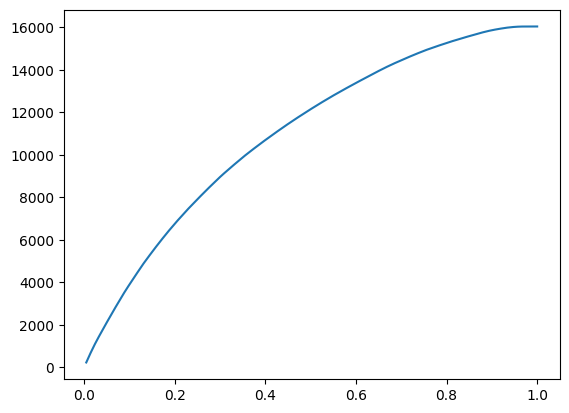

In [49]:
plt.plot(data["area_prop"], data["cum_count"])

(array([0.00208824, 0.        , 0.        , 0.00208824, 0.        ,
        0.00208824, 0.00208824, 0.        , 0.        , 0.02088244,
        0.01252946, 0.02923542, 0.03967664, 0.04802961, 0.085618  ,
        0.22970683, 0.22135386, 0.35500147, 0.32158957, 0.46359016,
        0.41138406, 0.39258986, 0.71000294, 0.63482616, 0.44897245,
        0.40929581, 0.46359016, 0.36544269, 0.41973703, 0.38214864,
        0.31950132, 0.26311874, 0.25685401, 0.22553035, 0.24432454,
        0.19420669, 0.21091264, 0.21091264, 0.14826532, 0.15870654,
        0.10650044, 0.12738288, 0.10232395, 0.09814747, 0.08979449,
        0.09188273, 0.0522061 , 0.04385312, 0.07935327, 0.04802961,
        0.03967664, 0.03550015, 0.0187942 , 0.02505893, 0.03132366,
        0.00835298, 0.02088244, 0.02088244, 0.01252946, 0.01044122,
        0.01670595, 0.00835298, 0.00417649, 0.00626473, 0.00208824,
        0.00208824, 0.00626473, 0.00417649, 0.00626473, 0.00208824,
        0.        , 0.        , 0.00208824, 0.00

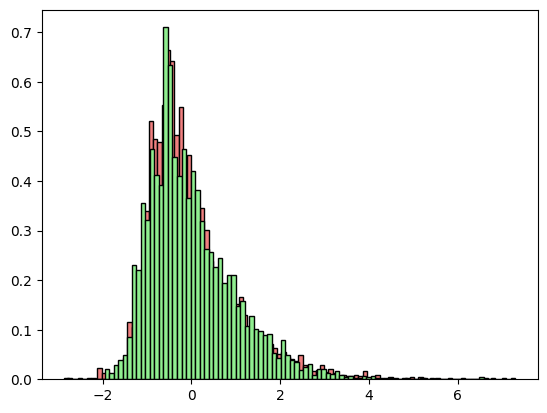

In [190]:
data = hpfs_600.copy()

plt.hist(data[data["region"] == "tumour"]["norm_density"], bins=100, color="lightcoral", label="0.6mm", edgecolor="black", density=True)
plt.hist(data[data["region"] == "IM"]["norm_density"], bins=100, color="lightgreen", label="0.6mm", edgecolor="black", density=True)

In [191]:
new_df = hpfs_600.groupby(["sampleid", "region"])["density"].mean().reset_index()
new_df["std_den"] = hpfs_600.groupby(["sampleid", "region"])["density"].std().reset_index()["density"]

In [192]:
new_df["sample_area"] = ((1.96*new_df["std_den"])/(0.1*new_df["density"]))**2 * 0.6**2

In [193]:
new_df = new_df.merge(hpfs_600.groupby(["sampleid", "region"])["area"].sum().reset_index(), on=["sampleid", "region"], how="left")

In [194]:
new_df["sample_prop"] = (new_df["sample_area"] / new_df["area"]).clip(upper=1)

In [195]:
new_df["sample_prop_mod"] = new_df["sample_prop"] / (1 + new_df["sample_prop"]/1.0)

In [196]:
new_df

,sampleid,region,density,std_den,sample_area,area,sample_prop,sample_prop_mod
0,01_F,IM,839.458825,494.467089,47.983357,40.425103,1.000000,0.500000
1,01_F,tumour,813.227942,379.580390,30.129893,177.986036,0.169282,0.144775
2,01_G,IM,196.222406,241.914077,210.203397,24.531385,1.000000,0.500000
3,01_G,tumour,284.777534,211.962288,76.616161,18.872700,1.000000,0.500000
4,02_G,IM,901.483724,467.299038,37.161107,25.558613,1.000000,0.500000
...,...,...,...,...,...,...,...,...
64,28_FSC,IM,200.261405,154.889213,82.729895,34.371379,1.000000,0.500000
65,28_FSC,tumour,126.923891,79.141256,53.769223,45.228434,1.000000,0.500000
66,29_L,IM,323.914711,275.556860,100.086557,63.619710,1.000000,0.500000
67,29_L,tumour,187.645622,130.269841,66.653896,11.363348,1.000000,0.500000


In [197]:
new_df[new_df["region"] == "tumour"]["sample_prop_mod"].mean()

0.42474091089384464

In [198]:
new_df[new_df["region"] == "IM"]["sample_prop_mod"].mean()

0.4708086833366648

### Calculate Mean Density in Top and Bottom Tertile per Sampleid

In [ ]:
sampleid_list = []
min_list = []
max_list = []
for sampleid in sampleids:
    spatdat = SpatDat(sampleid=sampleid, parent_filepath=parent_filepath)
    spatdat.compute_fields(width_microns=300)

    hpfs = spatdat.hpfs.sort_values("density").reset_index(drop=True)
    min_hpf = hpfs.iloc[:len(hpfs) // 3]["density"].mean()
    max_hpf = hpfs.iloc[-len(hpfs) // 3:]["density"].mean()

    sampleid_list.append(sampleid)
    min_list.append(min_hpf)
    max_list.append(max_hpf)

results = pd.DataFrame({"sampleid": sampleid_list, "mean_bottom": min_list, "mean_top": max_list})
results

,sampleid,mean_bottom,mean_top
0,01_F,311.249739,1392.295520
1,01_G,3.396343,582.168411
2,02_G,397.736308,1731.960410
3,02_H,170.019900,747.408057
4,03_B,0.000000,444.468845
5,03_H,27.254009,587.565365
6,04_I,106.598958,823.814780
7,04_N,100.662989,913.185303
8,05_G,171.682277,1564.396521
9,05_I,93.253766,1735.786383


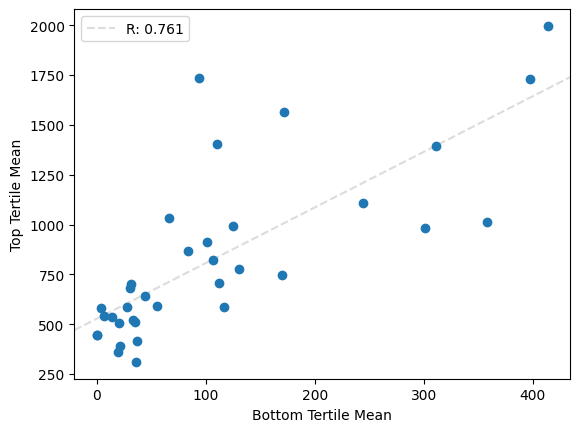

In [22]:
plt.scatter(results["mean_bottom"], results["mean_top"])
plt.xlabel("Bottom Tertile Mean")
plt.ylabel("Top Tertile Mean")

slope, intercept, r_value, p_value, std_err = stats.linregress(results["mean_bottom"], results["mean_top"])

plt.gca().axline((0, intercept), slope=slope, color="gainsboro", linestyle="--", zorder=0, label=f"R: {round(r_value, 3)}")
plt.gca().legend()
